In [1]:
from paths import metadata_folder

In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyobsbox import ObsBoxGenerator
from pyobsbox.utils import H5_PLANE_KEY
from tqdm.auto import tqdm

In [3]:
plt.rcParams["figure.figsize"] = (16, 4)

# List metadata files

In [4]:
list(metadata_folder.glob("metadata_*"))

[PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B2H_Inst_23528.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_32.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_1024.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_34994.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1V_Inst_51335.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B2V_Inst_60652.h5')]

In [5]:
metadata_file = metadata_folder / "metadata_B1H_Inst_34994.h5"

In [6]:
metadata = pd.read_hdf(metadata_file)
metadata.head()

,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length
1,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,0.0,0.0,65536
2,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,4.0,1.0,65536
3,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,8.0,2.0,65536
4,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,12.0,3.0,65536
5,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,894.0,4.0,65536


# Select a random sample to vizualize

In [7]:
viz_sample = metadata.sample(20, replace=False)
viz_sample.head()

,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length
706851,Inst,6690,1,h,7,2018-05-16 08:27:13,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...,1227,2080.0,780.0,65536
573879,Inst,6615,1,h,7,2018-04-26 20:09:13,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6615/...,603,544.0,155.0,65536
8213295,Inst,6612,1,h,7,2018-04-25 21:02:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6612/...,603,439.0,145.0,65536
9863145,Inst,7068,1,h,7,2018-08-20 00:33:37,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7068/...,540,715.0,524.0,65536
5885473,Inst,7477,1,h,7,2018-11-26 22:21:53,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7477/...,460,2103.0,444.0,65536


# Load the data

In [8]:
data = []
for file_path, df in tqdm(viz_sample.groupby("file")):
    beam = df.beam.iloc[0]
    plane = df.plane.iloc[0]
    with h5py.File(file_path, 'r') as store:
        data.append(store["B{}".format(beam)][H5_PLANE_KEY[plane]][:, df['bunch_index'].sort_values()].T)
data = np.vstack(data)
data.shape

(20, 65536)

# Plot

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/instability_data/06690_Inst_B1H_Q7_20180516_08h27m13s.h5


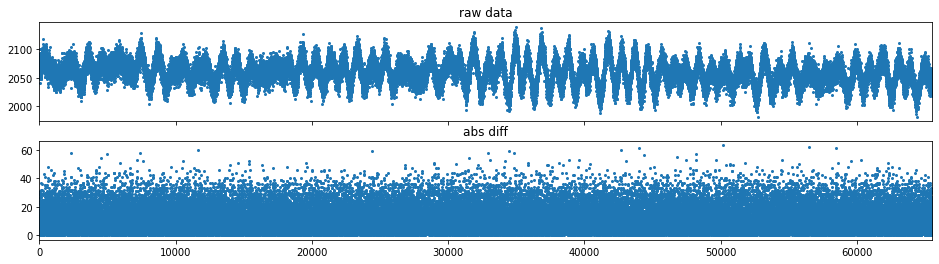

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6615/instability_data/06615_Inst_B1H_Q7_20180426_20h09m13s.h5


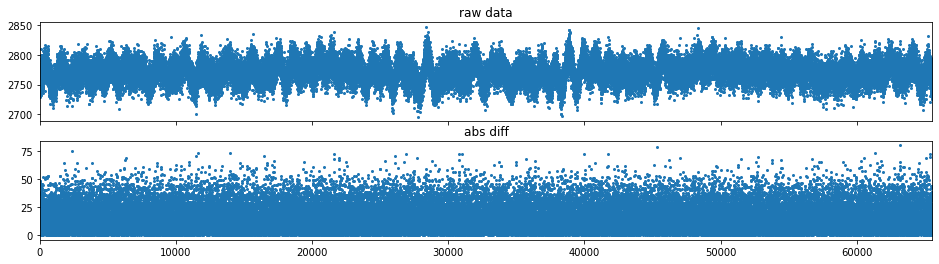

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6612/instability_data/06612_Inst_B1H_Q7_20180425_21h02m14s.h5


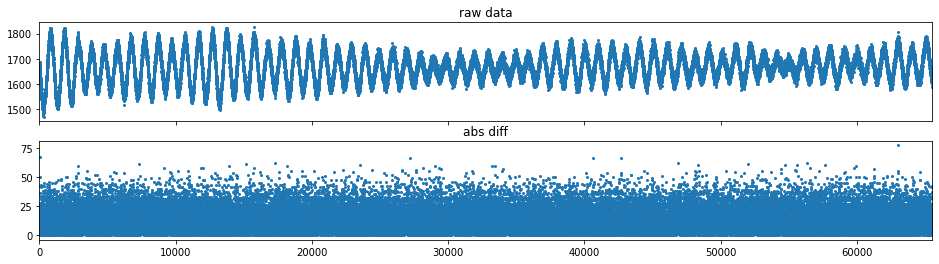

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7068/instability_data/07068_Inst_B1H_Q7_20180820_00h33m37s.h5


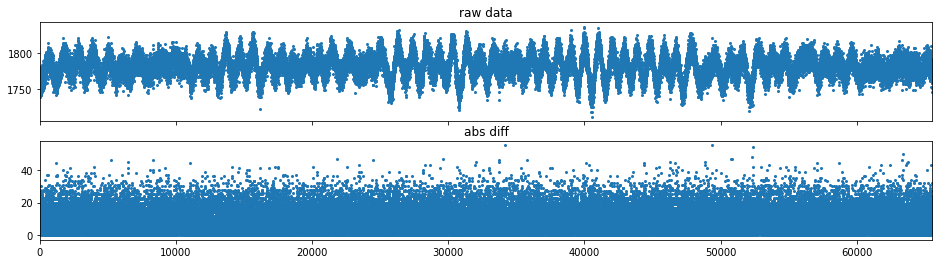

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7477/instability_data/07477_Inst_B1H_Q7_20181126_22h21m53s.h5


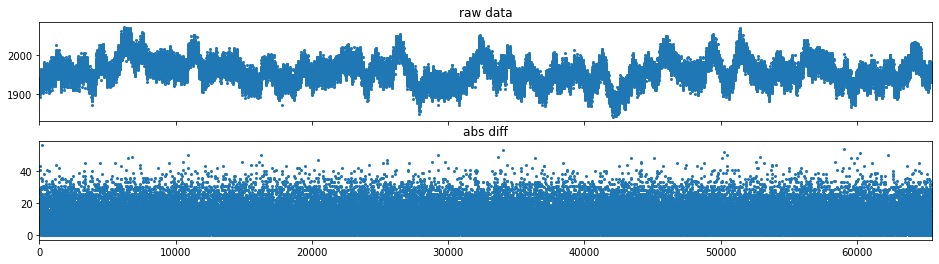

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6937/instability_data/06937_Inst_B1H_Q7_20180717_16h59m09s.h5


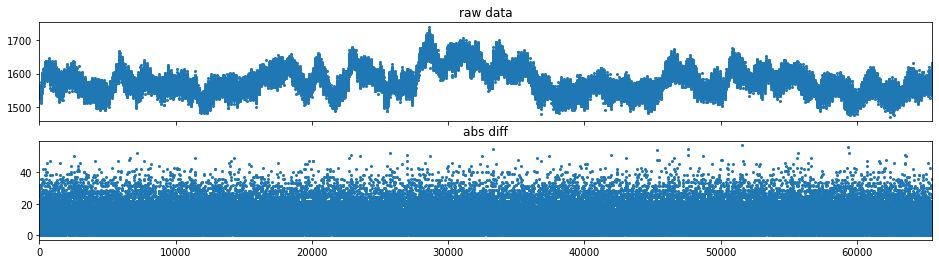

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6639/instability_data/06639_Inst_B1H_Q7_20180503_15h35m15s.h5


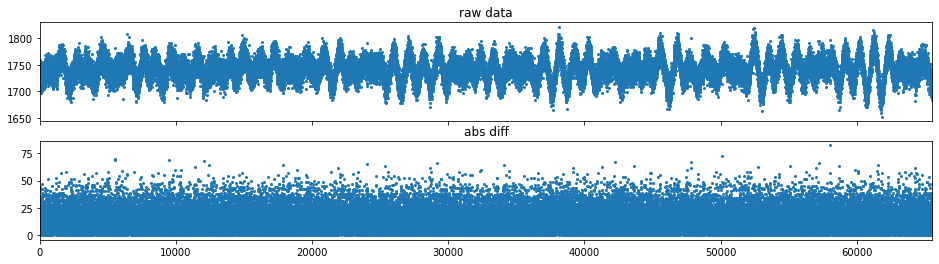

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7033/instability_data/07033_Inst_B1H_Q7_20180807_14h16m15s.h5


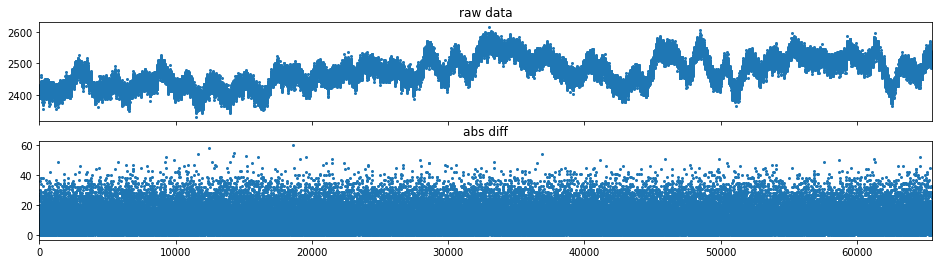

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/instability_data/06919_Inst_B1H_Q7_20180714_02h37m14s.h5


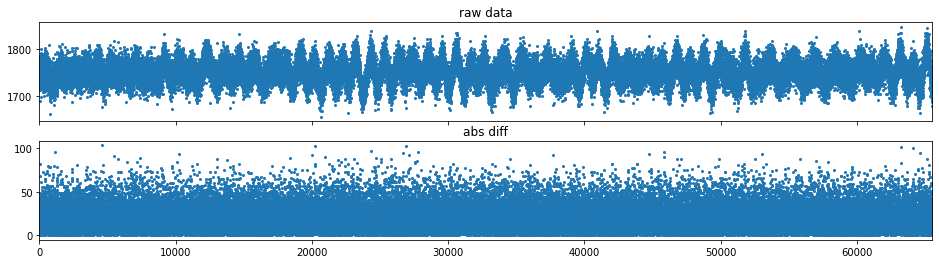

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7270/instability_data/07270_Inst_B1H_Q7_20181008_23h58m03s.h5


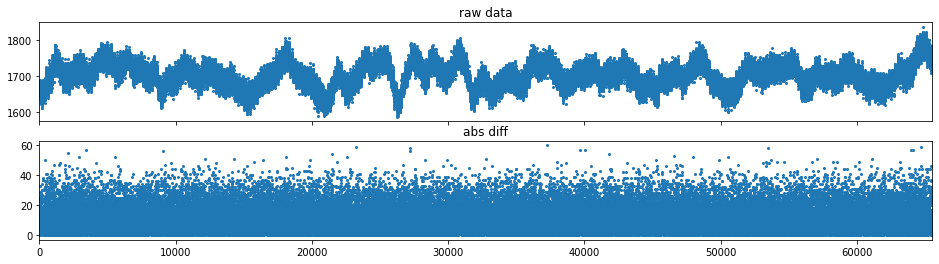

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6694/instability_data/06694_Inst_B1H_Q7_20180517_08h43m07s.h5


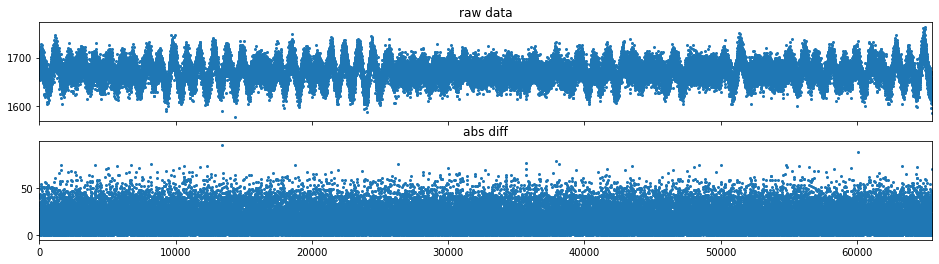

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6929/instability_data/06929_Inst_B1H_Q7_20180716_03h30m50s.h5


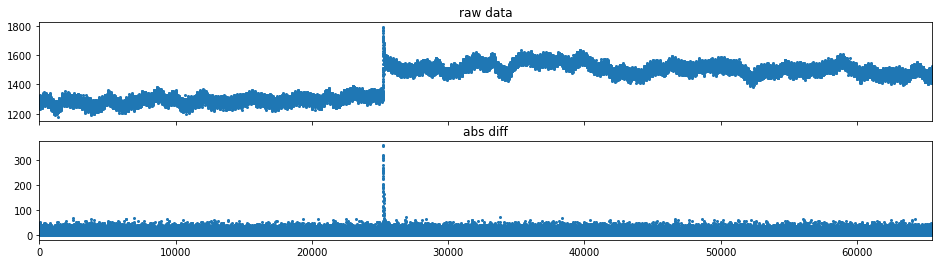

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6399/instability_data/06399_Inst_B1H_Q7_20171121_00h20m14s.h5


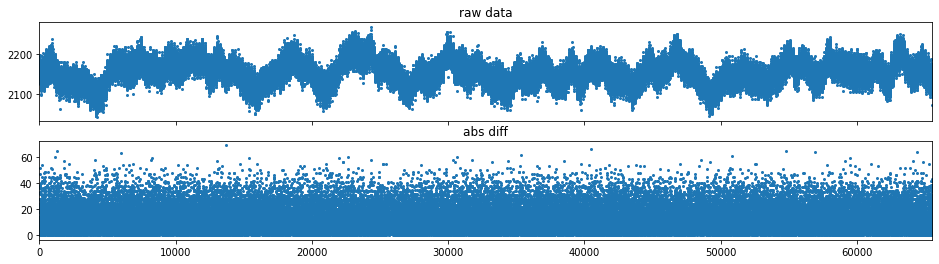

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7274/instability_data/07274_Inst_B1H_Q7_20181011_00h20m34s.h5


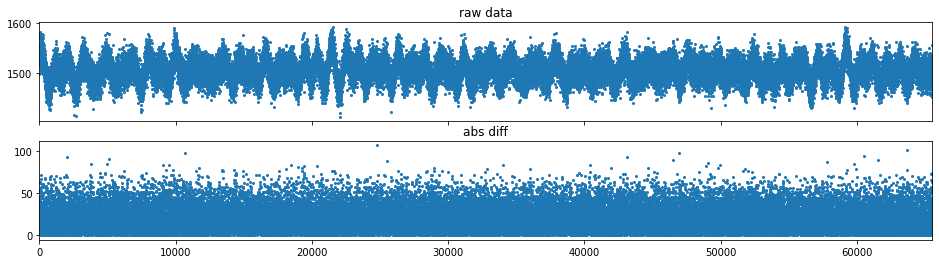

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/instability_data/06711_Inst_B1H_Q7_20180522_13h14m14s.h5


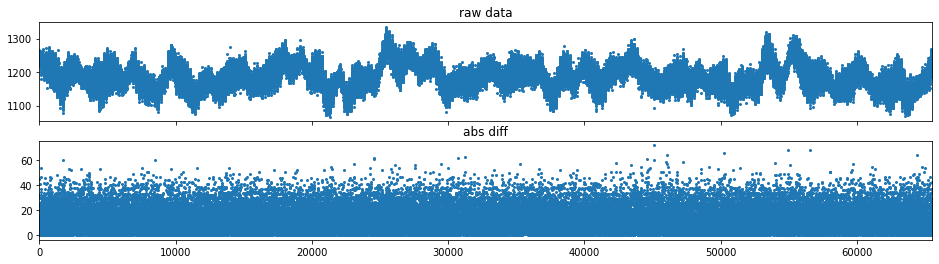

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6654/instability_data/06654_Inst_B1H_Q7_20180507_22h16m54s.h5


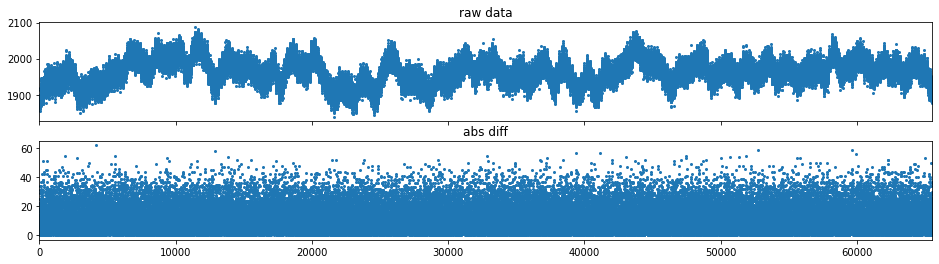

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6860/instability_data/06860_Inst_B1H_Q7_20180628_16h43m34s.h5


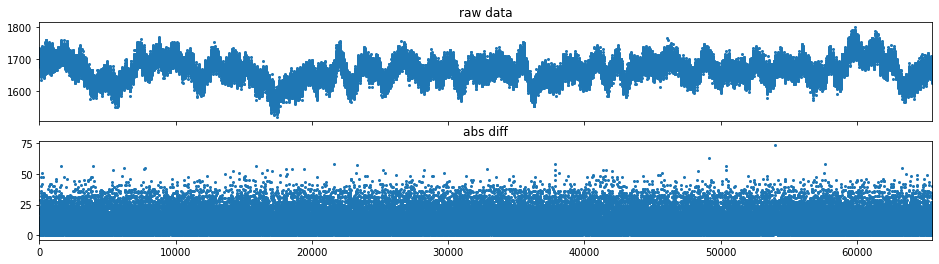

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7354/instability_data/07354_Inst_B1H_Q7_20181025_20h08m27s.h5


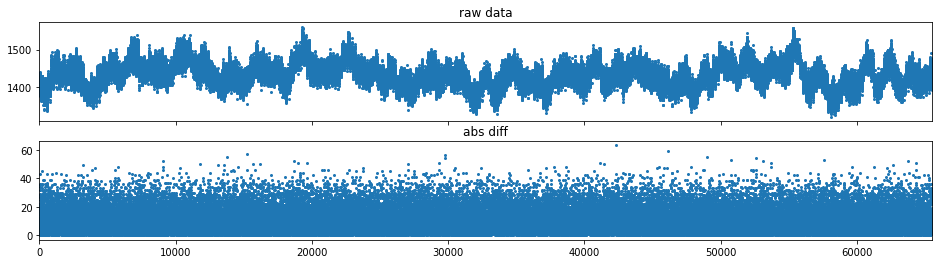

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6239/instability_data/06239_Inst_B1H_Q7_20170924_06h01m14s.h5


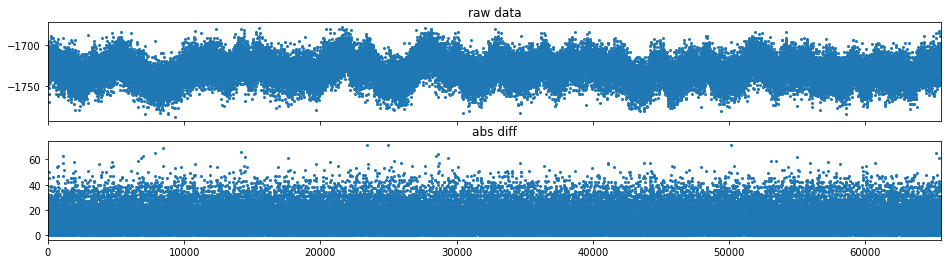

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7131/instability_data/07131_Inst_B1H_Q7_20180906_14h36m51s.h5


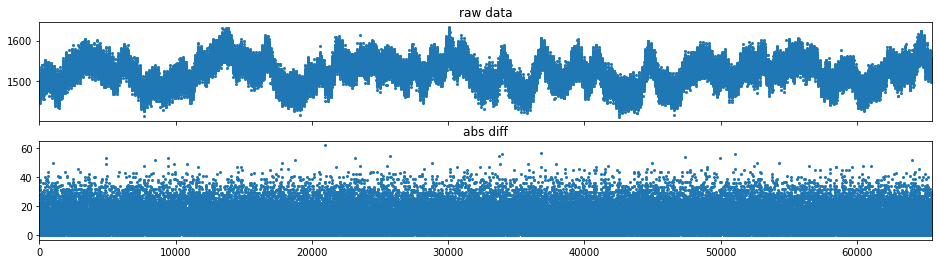

In [9]:
for signal, (_, row) in zip(data, viz_sample.iterrows()):
    print(row["file"])
    fig, axes = plt.subplots(2, sharex=True)
    x = range(len(signal))
    axes[0].scatter(x, signal, s=4)
    axes[0].set_title('raw data')
    
    axes[1].scatter(x[: -1], np.abs(np.diff(signal)), s=4)
    axes[1].set_title('abs diff')
    axes[1].set_xlim([0, len(signal)])
    plt.show()